# 1、数据处理（对经纬度进行划分、每隔5分钟对各个区域的出租车数量进行计数）

In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import time

# 查看原数据

In [3]:
file_dir = os.path.abspath('D:/代码存储/20180628_Traffic_Predictiong_by_SVM&LSTM/数据抽取')
f = file_dir + os.sep + 'G_201601.csv'
fn = open(f)
data = pd.read_csv(fn)

In [4]:
data

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-01-01 00:29:24,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,1,...,8.0,0.5,0.5,1.86,0.00,NaN,0.3,11.16,1,1.0
1,2,2016-01-01 00:19:39,2016-01-01 00:39:18,N,1,-73.952675,40.723175,-73.923920,40.761379,1,...,15.5,0.5,0.5,0.00,0.00,NaN,0.3,16.80,2,1.0
2,2,2016-01-01 00:19:33,2016-01-01 00:39:48,N,1,-73.971611,40.676105,-74.013161,40.646072,1,...,16.5,0.5,0.5,4.45,0.00,NaN,0.3,22.25,1,1.0
3,2,2016-01-01 00:22:12,2016-01-01 00:38:32,N,1,-73.989502,40.669579,-74.000648,40.689034,1,...,13.5,0.5,0.5,0.00,0.00,NaN,0.3,14.80,2,1.0
4,2,2016-01-01 00:24:01,2016-01-01 00:39:22,N,1,-73.964729,40.682854,-73.940720,40.663013,1,...,12.0,0.5,0.5,0.00,0.00,NaN,0.3,13.30,2,1.0
5,2,2016-01-01 00:32:59,2016-01-01 00:39:35,N,1,-73.891144,40.746456,-73.867744,40.742111,1,...,7.0,0.5,0.5,0.00,0.00,NaN,0.3,8.30,2,1.0
6,2,2016-01-01 00:34:42,2016-01-01 00:39:21,N,1,-73.896675,40.746197,-73.886192,40.745689,1,...,5.0,0.5,0.5,0.00,0.00,NaN,0.3,6.30,2,1.0
7,2,2016-01-01 00:31:23,2016-01-01 00:39:36,N,1,-73.953354,40.803558,-73.949150,40.794121,1,...,7.0,0.5,0.5,0.00,0.00,NaN,0.3,8.30,2,1.0
8,2,2016-01-01 00:24:40,2016-01-01 00:39:52,N,1,-73.994064,40.702816,-73.971573,40.679726,1,...,12.0,0.5,0.5,2.00,0.00,NaN,0.3,15.30,1,1.0
9,2,2016-01-01 00:28:59,2016-01-01 00:39:23,N,1,-73.914131,40.756641,-73.917549,40.739658,1,...,9.0,0.5,0.5,1.60,0.00,NaN,0.3,11.90,1,1.0


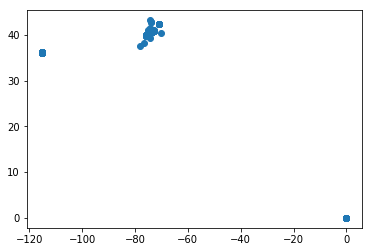

In [5]:
data = data.loc[:,['lpep_pickup_datetime','Pickup_longitude', 'Pickup_latitude']] #只取时间、经度、纬度三列值
# 画图查看经纬度分布情况
longitude = data['Pickup_longitude'].tolist()
latitude = data['Pickup_latitude'].tolist()
plt.scatter(longitude,latitude)
plt.show()

观察上图，将经纬度为0，和经度为-115的点删去，重点分析经度密集于-75左右的点

# 数据预处理

In [6]:
data=data[~data['Pickup_longitude'].isin([0])]#删除经度为0的点
data=data[~data['Pickup_latitude'].isin([0])]#删除纬度为0的点
data=data[data['Pickup_longitude'] > -115]#删除经度密集于-115的点

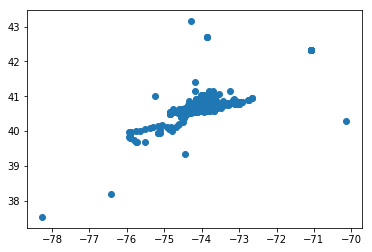

In [7]:
# 画图查看经纬度分布情况
longitude = data['Pickup_longitude'].tolist()
latitude = data['Pickup_latitude'].tolist()
plt.scatter(longitude,latitude)
plt.show()

In [8]:
# 按照经纬度和时间对数据进行分区
def transform(df,len,lon_min,lon_range,lat_min,lat_range):
    rows = []
    for i in range(len):
        row = df.iloc[i].tolist()
        y_m_d = row[0].split(' ')[0]
        h_m_s = row[0].split(' ')[1]
        month = int(y_m_d.split('-')[1])
        day = int(y_m_d.split('-')[2])
        hour = int(h_m_s.split(':')[0])
        minute = int(h_m_s.split(':')[1])
        second = int(h_m_s.split(':')[2])
        date_num = int((((day*24+hour)*60+minute)*60+second)/300-288)+1
        
        #将经纬度区域划分为10000份
        lon_num = str(int(abs(float(row[1])-lon_min)/(lon_range/100))+1) #将经度划分为100个
        lat_num = str(int(float(row[2]-lat_min)/(lat_range/100))+1) #将纬度划分为100个
        lon_lat = lon_num+' '+lat_num
        date_num = str(date_num)
        date_lon_lat = date_num+' '+lon_num+' '+lat_num
        date_num = int(date_num)

        row.append(month)
        row.append(day)
        row.append(hour)
        row.append(minute)
        row.append(second)
        row.append(date_num)
        row.append(lon_lat)
        row.append(date_lon_lat)
        rows.append(row)

    data = pd.DataFrame(rows, columns = ['datetime','longitude','latitude','month','day','hour','minute','second','date_num','lon_lat','date_lon_lat'])
    return data

In [9]:
lon_min = data['Pickup_longitude'].min()
lon_max = data['Pickup_longitude'].max()
lon_range = lon_max-lon_min

lat_min = data['Pickup_latitude'].min()
lat_max = data['Pickup_latitude'].max()
lat_range = lat_max-lat_min

In [10]:
# 查看经纬度最值
lon_min,lon_max,lat_min,lat_max

(-78.25851440429686, -70.14051818847656, 37.52218627929688, 43.168006896972656)

In [11]:
df = transform(data, len=len(data), lon_min=lon_min, lon_range=lon_range, lat_min=lat_min, lat_range=lat_range)

In [12]:
df #date_num列为数据的时间编号，lon_lat列数据的经纬度编号

,datetime,longitude,latitude,month,day,hour,minute,second,date_num,lon_lat,date_lon_lat
0,2016-01-01 00:29:24,-73.928642,40.680611,1,1,0,29,24,6,54 56,6 54 56
1,2016-01-01 00:19:39,-73.952675,40.723175,1,1,0,19,39,4,54 57,4 54 57
2,2016-01-01 00:19:33,-73.971611,40.676105,1,1,0,19,33,4,53 56,4 53 56
3,2016-01-01 00:22:12,-73.989502,40.669579,1,1,0,22,12,5,53 56,5 53 56
4,2016-01-01 00:24:01,-73.964729,40.682854,1,1,0,24,1,5,53 56,5 53 56
5,2016-01-01 00:32:59,-73.891144,40.746456,1,1,0,32,59,7,54 58,7 54 58
6,2016-01-01 00:34:42,-73.896675,40.746197,1,1,0,34,42,7,54 58,7 54 58
7,2016-01-01 00:31:23,-73.953354,40.803558,1,1,0,31,23,7,54 59,7 54 59
8,2016-01-01 00:24:40,-73.994064,40.702816,1,1,0,24,40,5,53 57,5 53 57
9,2016-01-01 00:28:59,-73.914131,40.756641,1,1,0,28,59,6,54 58,6 54 58


In [13]:
# 对同一时间、经纬度编号的数据行进行计数
def getlistnum(li):
    li = list(li)
    li_ = list(set(li))#去重
    dict = {}
    for i in li_:
        dict.update({i:li.count(i)})
    return dict

In [14]:
# 不考虑经纬度编号，查看整个区域内出租车数量随时间的变化
date_num = getlistnum(df['date_num'])

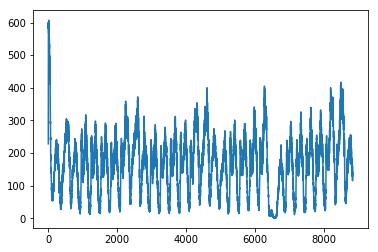

In [15]:
plt.plot(list(date_num.values()))
plt.show()

图1 2016年1月每隔5分钟的纽约市出租车数量波动情况

## 挑选出租车数量比较多的区域

In [16]:
li = list(set(df['lon_lat'].tolist()))

In [17]:
lon_lat_num = getlistnum(df['lon_lat'])
di = {v:k for k,v in lon_lat_num.items()}
for i in list(di.keys()):
    if i >50: #删选出2016年1月内出租车总数量大于50的区域
        print(di[i],':',i)

54 59 : 286599
56 55 : 103
56 58 : 295
55 59 : 12096
54 55 : 6282
51 56 : 60
54 58 : 342325
53 57 : 264480
52 55 : 97
53 56 : 134106
55 57 : 92563
56 56 : 752
53 55 : 5457
55 60 : 3129
54 56 : 59265
54 57 : 106136
55 58 : 31111
54 61 : 75
53 58 : 8496
56 57 : 1831
55 61 : 114
53 59 : 55406
51 55 : 74
54 60 : 27831
55 56 : 3315


## 取出租车数量前三名，即经纬度编号为(54 58)(54 59)(53 57)的区域，进行分析

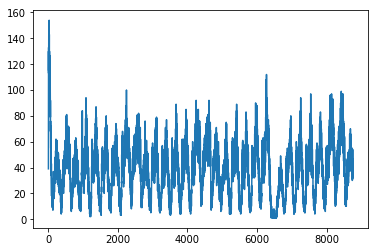

In [18]:
df_5458 = df[df['lon_lat']=='54 58']
date_num_5458 = getlistnum(df_5458['date_num'])

# 保存结果
date_num_5458_file = json.dumps(date_num_5458)
f1 = open('date_num_5458.json', 'w')
f1.write(date_num_5458_file)
f1.close()

# 结果可视化
plt.plot(list(date_num_5458.values()))
plt.show()

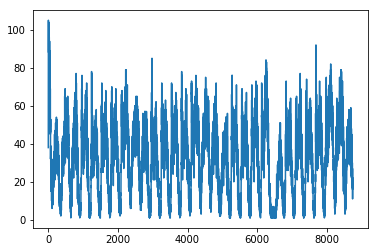

In [19]:
df_5459 = df[df['lon_lat']=='54 59']
date_num_5459 = getlistnum(df_5459['date_num'])

# 保存结果
date_num_5459_file = json.dumps(date_num_5459)
f2 = open('date_num_5459.json', 'w')
f2.write(date_num_5459_file)
f2.close()

# 结果可视化
plt.plot(list(date_num_5459.values()))
plt.show()

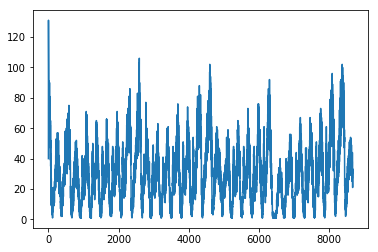

In [20]:
df_5357 = df[df['lon_lat']=='53 57']
date_num_5357 = getlistnum(df_5357['date_num'])

# 保存结果
date_num_5357_file = json.dumps(date_num_5357)
f3 = open('date_num_5357.json', 'w')
f3.write(date_num_5357_file)
f3.close()

# 结果可视化
plt.plot(list(date_num_5357.values()))
plt.show()

观察上图  三个区域出租车数量随时间浮动的趋势相似

# 2 预测

## 导入数据（此处仅对经纬度编号为54 58的数据进行预测）

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [24]:
def get_data(filename):
    with open(filename, 'r') as fn:
        f = json.load(fn)
        dates = list(f.keys())
        series = pd.DataFrame(list(f.values()))
        scaler = MinMaxScaler(feature_range=(-1,1)) 
        scaled = scaler.fit_transform(series) 
        nums = scaled.tolist()
    return dates,nums

In [25]:
dates,nums = get_data('date_num_5458.json')

In [26]:
nums

[[-0.5032679738562091],
 [0.05882352941176472],
 [0.11111111111111116],
 [0.41176470588235303],
 [0.6862745098039216],
 [0.4640522875816995],
 [0.7254901960784315],
 [0.4901960784313726],
 [0.8169934640522878],
 [0.6339869281045754],
 [0.8954248366013073],
 [0.7254901960784315],
 [0.8300653594771243],
 [0.7647058823529413],
 [0.7647058823529413],
 [0.6993464052287583],
 [0.673202614379085],
 [0.8823529411764708],
 [0.7647058823529413],
 [0.4509803921568629],
 [0.9738562091503269],
 [0.6862745098039216],
 [1.0],
 [0.4640522875816995],
 [0.6862745098039216],
 [0.6601307189542485],
 [0.8562091503267975],
 [0.3333333333333335],
 [0.7254901960784315],
 [0.542483660130719],
 [0.6862745098039216],
 [0.4509803921568629],
 [0.6209150326797386],
 [0.5555555555555556],
 [0.47712418300653603],
 [0.6470588235294119],
 [0.3333333333333335],
 [0.2679738562091505],
 [0.2679738562091505],
 [0.4509803921568629],
 [0.37254901960784315],
 [0.1633986928104576],
 [0.2287581699346406],
 [0.34640522875817004]

# 2.1 利用SVR模型对时间序列进行预测

In [27]:
import time
import csv
from sklearn.svm import SVR

In [28]:
# 构建SVR预测模型
def svr_predictor(dates, nums, x):
    dates = np.reshape(dates,(len(dates),1))
    svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma=0.001)
    # fitting
    start_time_1 = time.time()
    svr_rbf.fit(dates,nums)
    end_time_1 = time.time() - start_time_1
    # predicting
    start_time_2 = time.time()
    predict = svr_rbf.predict(x)[0]
    end_time_2 = time.time() - start_time_2
    
    return predict,end_time_1,end_time_2

In [31]:
nrow = int(len(dates))
predicted_svm,Fitting_time_svm,Predicting_time_svm = [],[],[]
for i in range(2016,2116): #svr模型训练较慢，此处仅预测前100条数据
    print('%d/%d' %(i,nrow))
    predicted,fit_time,predict_time = svr_predictor(dates[i-2016:i], nums[i-2016:i], dates[i]) #用前2016条数据预测后一条数据，即用一周的数据预测下一五分钟的出租车数量
    Fitting_time_svm.append(fit_time) #记录每次fit的时间
    Predicting_time_svm.append(predict_time) #记录每次预测的时间
    predicted_svm.append(predicted) #记录每次的预测结果
    
print(Fitting_time_svm,Predicting_time_svm,predicted_svm)

# Fitting_time_svm存储结果
Fitting_time_svm_file = json.dumps(Fitting_time_svm)
f = open('Fitting_time_svm.json', 'w')
f.write(Fitting_time_svm_file)
f.close()

# Predicting_time_svm存储结果
Predicting_time_svm_file = json.dumps(Predicting_time_svm)
f = open('Predicting_time_svm.json', 'w')
f.write(Predicting_time_svm_file)
f.close()

# predicted_svm存储结果
predicted_svm_file = json.dumps(predicted_svm)
f = open('predicted_svm.json', 'w')
f.write(predicted_svm_file)
f.close()

2016/8756


d:\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2017/8756
2018/8756
2019/8756
2020/8756
2021/8756
2022/8756
2023/8756
2024/8756
2025/8756
2026/8756
2027/8756
2028/8756
2029/8756
2030/8756
2031/8756
2032/8756
2033/8756
2034/8756
2035/8756
2036/8756
2037/8756
2038/8756
2039/8756
2040/8756
2041/8756
2042/8756
2043/8756
2044/8756
2045/8756
2046/8756
2047/8756
2048/8756
2049/8756
2050/8756
2051/8756
2052/8756
2053/8756
2054/8756
2055/8756
2056/8756
2057/8756
2058/8756
2059/8756
2060/8756
2061/8756
2062/8756
2063/8756
2064/8756
2065/8756
2066/8756
2067/8756
2068/8756
2069/8756
2070/8756
2071/8756
2072/8756
2073/8756
2074/8756
2075/8756
2076/8756
2077/8756
2078/8756
2079/8756
2080/8756
2081/8756
2082/8756
2083/8756
2084/8756
2085/8756
2086/8756
2087/8756
2088/8756
2089/8756
2090/8756
2091/8756
2092/8756
2093/8756
2094/8756
2095/8756
2096/8756
2097/8756
2098/8756
2099/8756
2100/8756
2101/8756
2102/8756
2103/8756
2104/8756
2105/8756
2106/8756
2107/8756
2108/8756
2109/8756
2110/8756
2111/8756
2112/8756
2113/8756
2114/8756
2115/8756
[4.3114533

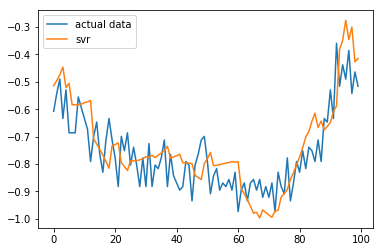

In [47]:
# 将预测值与实际值进行画图对比
plt.plot(nums[2016:2116], label = 'actual data')
plt.plot(predicted_svm, label = 'svr')
plt.legend()
plt.show()

# 2.2 利用LSTM模型对时间序列进行预测

In [33]:
import random
from keras.models import Sequential, model_from_json
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


## 导入数据

In [34]:
dataset = np.asarray(nums) 
dataset.shape

(8756, 1)

In [35]:
# 生成模型训练数据集（确定训练集的窗口长度）
def create_dataset(dataset, look_back): 
    #look_back为窗口，指需要多少数据用来预测下一次的数据，这里取一周的数据，即2016条数据,look_back 就是预测下一步所需要的 time steps
    dataX, dataY = [],[] #X为前一周的数据，Y为待预测的5分钟的数据。
    for i in range(len(dataset) - look_back-1):
        dataX.append(dataset[i:i+look_back])
        dataY.append(dataset[i+look_back]) 
    return np.asarray(dataX), np.asarray(dataY)

# fix random seed for reproducibility 
np.random.seed(7)

In [36]:
# normalize the dataset 
scaler = MinMaxScaler(feature_range=(0, 1)) 
dataset = scaler.fit_transform(dataset) 

# split into train and test sets 
train_size = int(len(dataset) * 0.7) #设定 67% 是训练数据，余下的是测试数据
test_size = len(dataset) - train_size 
train,test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [37]:
train.shape, test.shape

((6129, 1), (2627, 1))

In [38]:
# use this function to prepare the train and test datasets for modeling 
look_back = 2016
trainX, trainY = create_dataset(train, look_back) 
testX, testY = create_dataset(test, look_back)

投入到 LSTM 的 X 需要有这样的结构： [samples, time steps, features]，所以做一下变换

In [39]:
trainX.shape, testX.shape ,(trainX.shape[0], 1, trainX.shape[1]) , (testX.shape[0],1, testX.shape[1])

((4112, 2016, 1), (610, 2016, 1), (4112, 1, 2016), (610, 1, 2016))

In [40]:
# reshape input to be [samples, time steps, features] 
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1])) 
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## LSTM网络结构搭建

### 输入层有 1 个input，隐藏层有5个神经元，输出层就是预测一个值，激活函数用 sigmoid，迭代 100 次，batch size 为50

In [41]:
# create and fit the LSTM network 
model = Sequential() 
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

start_time_1 = time.time()
model.fit(trainX, trainY, epochs=100, batch_size=50, verbose=2)
end_time_1 = time.time()-start_time_1
print(end_time_1)

Epoch 1/100
 - 2s - loss: 0.0089
Epoch 2/100
 - 0s - loss: 0.0035
Epoch 3/100
 - 0s - loss: 0.0029
Epoch 4/100
 - 0s - loss: 0.0027
Epoch 5/100
 - 0s - loss: 0.0025
Epoch 6/100
 - 0s - loss: 0.0024
Epoch 7/100
 - 0s - loss: 0.0023
Epoch 8/100
 - 0s - loss: 0.0026
Epoch 9/100
 - 0s - loss: 0.0026
Epoch 10/100
 - 0s - loss: 0.0022
Epoch 11/100
 - 0s - loss: 0.0021
Epoch 12/100
 - 0s - loss: 0.0021
Epoch 13/100
 - 0s - loss: 0.0021
Epoch 14/100
 - 0s - loss: 0.0021
Epoch 15/100
 - 0s - loss: 0.0022
Epoch 16/100
 - 0s - loss: 0.0021
Epoch 17/100
 - 0s - loss: 0.0020
Epoch 18/100
 - 0s - loss: 0.0020
Epoch 19/100
 - 0s - loss: 0.0019
Epoch 20/100
 - 0s - loss: 0.0018
Epoch 21/100
 - 0s - loss: 0.0019
Epoch 22/100
 - 0s - loss: 0.0020
Epoch 23/100
 - 0s - loss: 0.0020
Epoch 24/100
 - 0s - loss: 0.0019
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s - loss: 0.0017
Epoch 28/100
 - 0s - loss: 0.0017
Epoch 29/100
 - 0s - loss: 0.0018
Epoch 30/100
 - 0s - lo

In [42]:
# make predictions
start_time_2 = time.time()
trainPredict = model.predict(trainX)
end_time_2 = time.time()-start_time_2
print(end_time_2)
testPredict = model.predict(testX)

0.321826696395874


In [43]:
# 计算误差之前要先把预测数据转换成同一单位
# invert predictions 
trainPredict = scaler.inverse_transform(trainPredict) 
trainY = scaler.inverse_transform(trainY) 
testPredict = scaler.inverse_transform(testPredict) 
testY = scaler.inverse_transform(testY)

In [44]:
import math
from sklearn.metrics import mean_squared_error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[0])) 
print('Train Score: %.2f RMSE' % (trainScore)) 
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.03 RMSE
Test Score: 0.51 RMSE


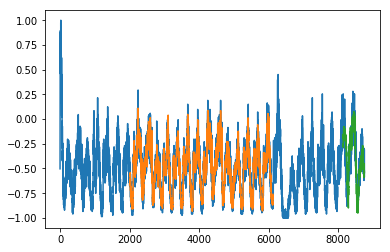

In [45]:
# shift train predictions for plotting 
trainPredictPlot = np.empty_like(dataset) 
trainPredictPlot[:, :] = np.nan 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict 

# shift test predictions for plotting 
testPredictPlot = np.empty_like(dataset) 
testPredictPlot[:, :] = np.nan 
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict 

# plot baseline and predictions 
plt.plot(nums) 
plt.plot(trainPredictPlot) 
plt.plot(testPredictPlot) 
plt.show()

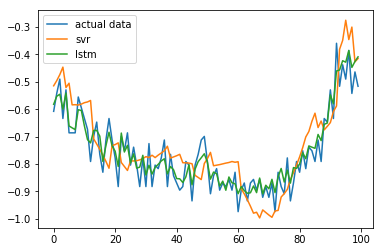

In [48]:
# 取原数据、svr模型预测值、lstm预测值的前100条进行画图对比
plt.plot(nums[2016:2116], label = 'actual data')
plt.plot(predicted_svm[:100], label = 'svr')
plt.plot(trainPredictPlot[2016:2116], label = 'lstm') 
plt.legend()
plt.show()